<a href="https://colab.research.google.com/github/johancamilo/Bloove/blob/master/T04_knn_johanvamilomedinapava.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
!rm -rf data/
!rm -rf data.z*
!drm -rf mlutils.p*
!mkdir -p data/
!cd data/
!wget https://github.com/marcoteran/artificialintelligence/raw/master/notebooks/01_machinelearnig/data/wine.data.txt -P data/
!ls

/bin/bash: drm: command not found
--2021-11-03 00:38:56--  https://github.com/marcoteran/artificialintelligence/raw/master/notebooks/01_machinelearnig/data/wine.data.txt
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/marcoteran/artificialintelligence/master/notebooks/01_machinelearnig/data/wine.data.txt [following]
--2021-11-03 00:38:56--  https://raw.githubusercontent.com/marcoteran/artificialintelligence/master/notebooks/01_machinelearnig/data/wine.data.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10925 (11K) [text/plain]
Saving to: ‘data/wine.data.txt’

wine.data.txt       100%[======

In [112]:
import pandas as pd

In [113]:
winedata_df = pd.read_csv('/content/data/wine.data.txt')

In [114]:
winedata_df.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoid,Proanthocyanins,Color,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [115]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
from sklearn.datasets import make_moons

In [116]:
def plot_data(X, y):
    y_unique = np.unique(y)
    colors = pl.cm.rainbow(np.linspace(0.0, 1.0, y_unique.size))
    for this_y, color in zip(y_unique, colors):
        this_X = X[y == this_y]
        pl.scatter(this_X[:, 0], this_X[:, 1],  c=color.reshape(1,-1),
                    alpha=0.5, edgecolor='k',
                    label="Class %s" % this_y)
    pl.legend(loc="best")
    pl.title("Data")
    
# Función para visualizar de la superficie de decisión de un clasificador
def plot_decision_region(X, pred_fun):
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 100)
    y_vals = np.linspace(min_y, max_y, 100)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            ZZ[i, j] = pred_fun(XX[i, j], YY[i, j])
    pl.contourf(XX, YY, ZZ, 100, cmap = pl.cm.coolwarm, vmin= -1, vmax=2)
    pl.colorbar()
    pl.xlabel("x")
    pl.ylabel("y")
    
def gen_pred_fun(clf):
    def pred_fun(x1, x2):
        x = np.array([[x1, x2]])
        return clf.predict(x)[0]
    return pred_fun

# Preprocesamiento de datos

In [117]:
wine_labels = winedata_df['Class']

In [118]:
winedata_df.drop('Class', axis=1, inplace=True)

In [119]:
X=np.array(winedata_df)
y=np.array(wine_labels)

In [120]:
X_PF=X[:,[6,12]]

# Training

In [121]:
print('Mostrar el tamaño de X:', X.shape)
print('Mostrar el tamaño de X_PF:', X_PF.shape)
print('Mostrar el tamaño de y:', y.shape)

print('Primeras 5 muestras\n', X_PF[:5,:])
print('Primeras 5 etiquetas\n', y[:5])

Mostrar el tamaño de X: (178, 13)
Mostrar el tamaño de X_PF: (178, 2)
Mostrar el tamaño de y: (178,)
Primeras 5 muestras
 [[   3.06 1065.  ]
 [   2.76 1050.  ]
 [   3.24 1185.  ]
 [   3.49 1480.  ]
 [   2.69  735.  ]]
Primeras 5 etiquetas
 [1 1 1 1 1]


In [122]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [123]:
X_train, X_test, y_train,y_test = train_test_split(X_PF, y,
                                                   test_size=0.3,
                                                   stratify=y)

In [124]:
k_values = list(range(1, 21))
print(k_values)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [125]:
train_error = []
generalization_error = []

# Utilizar un for
for nn in k_values:
  knn=KNeighborsClassifier(n_neighbors=nn)
  knn.fit(X_train,y_train)
  train_error.append(1-knn.score(X_train,y_train))
  generalization_error.append(1-knn.score(X_test,y_test))

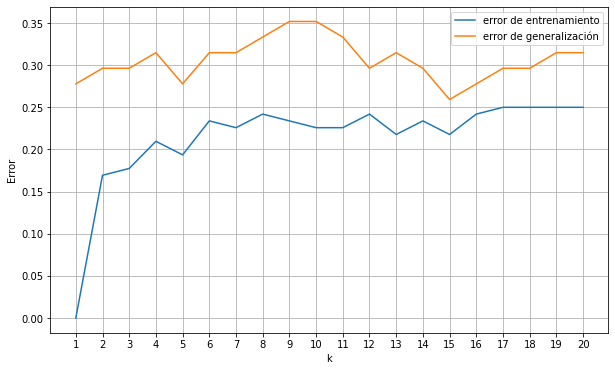

In [126]:
pl.figure(figsize=(10,6))

pl.plot(k_values, train_error, label='error de entrenamiento')
pl.plot(k_values, generalization_error, label='error de generalización')
pl.xticks(k_values)
pl.xlabel('k')
pl.ylabel('Error')
pl.legend()
pl.grid()

In [127]:
knn_opt=KNeighborsClassifier(n_neighbors=15)
knn_opt.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

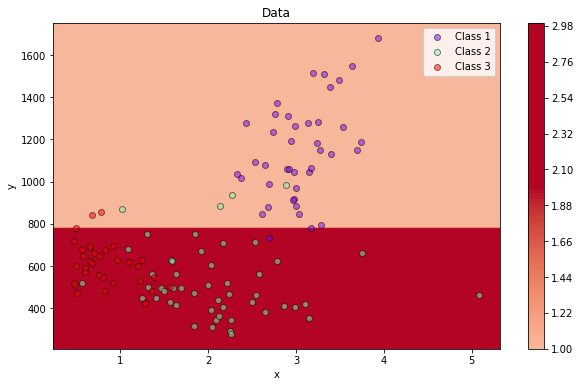

In [128]:
# Dibujar superficie de decición con los datos de entrenamiento
pl.figure(figsize=(10,6))
plot_decision_region(X_train, gen_pred_fun(knn_opt))
plot_data(X_train, y_train)

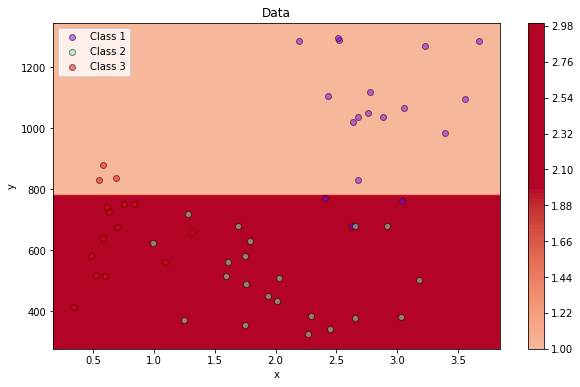

In [129]:
pl.figure(figsize=(10,6))
plot_decision_region(X_test, gen_pred_fun(knn_opt))
plot_data(X_test, y_test)

In [130]:
print('Error de generalización: {}'.format(1-knn.score(X_test,y_test)))

Error de generalización: 0.31481481481481477


# Matriz De Confusion

In [131]:
from sklearn.linear_model import LogisticRegression

classifier_FP = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=300);

classifier_FP.fit(X_PF,y)
predictions__FP = classifier_FP.predict(X_PF)
from sklearn.metrics import confusion_matrix

cnf_matrix_FP = confusion_matrix(y, predictions__FP)


In [132]:
print(cnf_matrix_FP)

[[56  3  0]
 [ 3 62  6]
 [ 0  6 42]]


In [133]:
import itertools
import pylab as pl

def plot_confusion_matrix(cm, classes,
                          title='Matriz de confusión',
                          cmap=pl.cm.Blues):
    print(cm) # Confusion matrix

    pl.imshow(cm, interpolation='nearest', cmap=cmap) # Pintamos la matriz como una imagen
    pl.title(title)
    pl.colorbar()
    tick_marks = np.arange(len(classes))
    pl.xticks(tick_marks, classes, rotation=45) # Nombre de las clases en X
    pl.yticks(tick_marks, classes) # Nombre de las clases en Y

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        pl.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black") 
        # Anotamos cada sección de la imagen con su valor correspondiente en la matriz

    pl.tight_layout()
    pl.ylabel('Valor de verdad')
    pl.xlabel('Valor predicho')

[[56  3  0]
 [ 3 62  6]
 [ 0  6 42]]


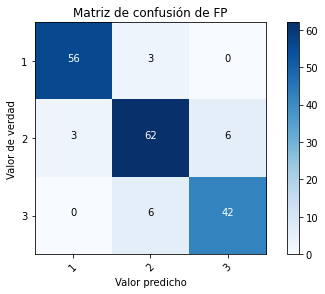

In [134]:

pl.figure()
plot_confusion_matrix(cnf_matrix_FP, classes=['1','2','3'],
                      title='Matriz de confusión de FP')

pl.show()

# Caracteristicas X

In [181]:
print('Mostrar el tamaño de X:', X.shape)
print('Mostrar el tamaño de y:', y.shape)

print('Primeras 5 muestras\n', X[:5,:])
print('Primeras 5 etiquetas\n', y[:5])

Mostrar el tamaño de X: (178, 13)
Mostrar el tamaño de y: (178,)
Primeras 5 muestras
 [[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]
Primeras 5 etiquetas
 [1 1 1 1 1]


In [183]:

X_train2, X_test2, y_train2,y_test2 = train_test_split(X, y,
                                                   test_size=0.3,
                                                   stratify=y)

In [184]:
k_values2 = list(range(1, 21))
print(k_values2)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [185]:
train_error = []
generalization_error = []

# Utilizar un for
for nn in k_values2:
  knn=KNeighborsClassifier(n_neighbors=nn)
  knn.fit(X_train2,y_train2)
  train_error.append(1-knn.score(X_train2,y_train2))
  generalization_error.append(1-knn.score(X_test2,y_test2))

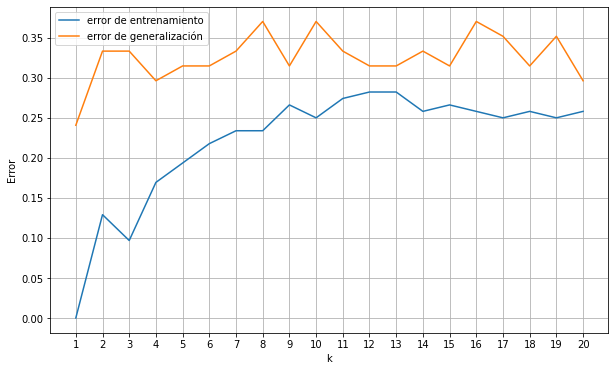

In [186]:
pl.figure(figsize=(10,6))

pl.plot(k_values2, train_error, label='error de entrenamiento')
pl.plot(k_values2, generalization_error, label='error de generalización')
pl.xticks(k_values2)
pl.xlabel('k')
pl.ylabel('Error')
pl.legend()
pl.grid()

In [187]:
knn_opt=KNeighborsClassifier(n_neighbors=1)
knn_opt.fit(X_train2,y_train2)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [188]:
print('Error de generalización: {}'.format(1-knn.score(X_test2,y_test2)))

Error de generalización: 0.2962962962962963


# Conclusion


Error de generalización: 0.31481481481481477 ( X_PF , y ) y
El Error de generalización de ( X , y )  =  0.2962962962962963 , en base a ambos errores observamos con X tuvimos un error menor que con X_PF